# Debug gamma_dot for linear UVLM solver


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
data = pd.read_csv('integr_order1.csv')
dt = 1 / 4 / 100
data['Time'] *= dt

In [59]:
data.head()

,Time,Int1_Gamma,Int1_Gamma_dot
0,0.0000,-2.18961,0.000000
1,0.0025,-2.18961,0.000007
2,0.0050,-2.18961,0.000023
3,0.0075,-2.18961,0.000041
4,0.0100,-2.18961,0.000061


In [73]:
def dfdx_1(f,dx):
    dfdx = np.zeros_like(f)
    for i in range(len(f)-1):
        dfdx[i+1] = (f[i+1]-f[i])/dx 
    return dfdx

In [74]:
gamm_dot = dfdx_1(data['Int1_Gamma'],dt)

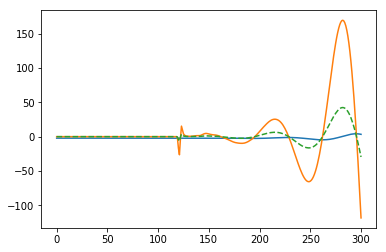

In [76]:
plt.plot(data['Int1_Gamma'])
plt.plot(gamm_dot)
plt.plot(data['Int1_Gamma_dot'],'--')

# Goland Wing

In [94]:
gol_data = pd.read_csv('goland_gamma_comparison.csv')
dt = 1.8288 / 8 / 50
gol_data.head()

,Time,panel_gamma NLIN,panel_gamma_dot NLIN,panel_gamma Predictor,panel_gamma_dot Predictor,panel_gamma - No Predictor,panel_gamma_dot - No Predictor
0,0,-1.68707,0.0,-1.68707,0.000000e+00,-1.68707,0.000000e+00
1,1,-1.68707,0.0,-1.68707,-6.600530e-07,-1.68707,3.319610e-07
2,2,-1.68707,0.0,-1.68707,-1.917370e-06,-1.68707,1.693850e-06
3,3,-1.68707,0.0,-1.68707,-2.226030e-06,-1.68707,3.182810e-06
4,4,-1.68707,0.0,-1.68707,-2.306140e-06,-1.68707,4.602910e-06


## Non Linear

In [95]:
gamma_dot = dfdx_1(gol_data['panel_gamma NLIN'], dt)

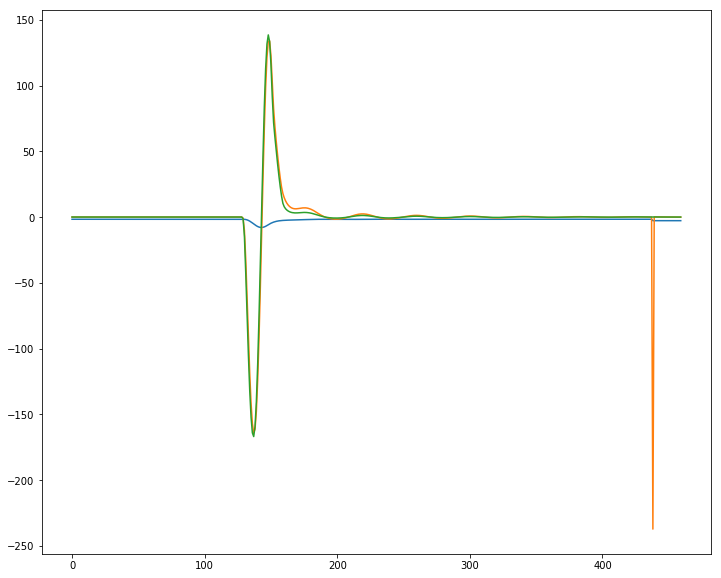

In [97]:
plt.figure(figsize=(12,10))
plt.plot(gol_data['panel_gamma NLIN'])
plt.plot(gamma_dot)
plt.plot(gol_data['panel_gamma_dot NLIN'])

## Predictor

In [98]:
gamma_dot = dfdx_1(gol_data['panel_gamma Predictor'], dt)

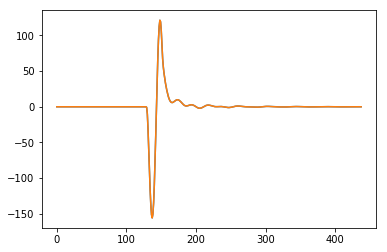

In [99]:
# plt.plot(gol_data['panel_gamma Predictor'])
plt.plot(gamma_dot)
plt.plot(gol_data['panel_gamma_dot Predictor'])

## No predictor

In [100]:
gamma_dot = dfdx_1(gol_data['panel_gamma - No Predictor'], dt)

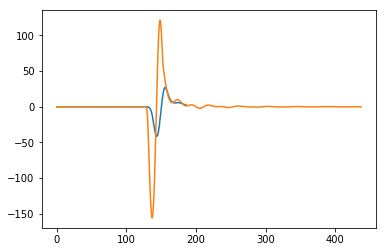

In [101]:
plt.plot(gamma_dot)
# plt.plot(gol_data['panel_gamma_dot - No Predictor'])
plt.plot(gol_data['panel_gamma_dot Predictor'])

## Correct state extraction with predictor methods

In [111]:
data = pd.read_csv('gamma_comparison_predictor_methods.csv')
dt = 1.8288 / 8 / 50
data.head()

,Time,panel_gamma Lin Pred,panel_gamma_dot Lin Pred,panel_gamma Lin NoPred,panel_gamma_dot Lin NoPred,panel_gamma_dot NLIN Unsteady,panel_gamma old_code pred,panel_gamma_dot_old code pred
0,0,-1.68707,0.000000e+00,-1.68707,0.000000e+00,0.0,-1.68707,0.000000e+00
1,1,-1.68707,-6.600530e-07,-1.68707,5.606020e-07,0.0,-1.68707,3.324350e-07
2,2,-1.68707,-1.917370e-06,-1.68707,3.122650e-06,0.0,-1.68707,1.694410e-06
3,3,-1.68707,-2.226030e-06,-1.68707,5.934130e-06,0.0,-1.68707,3.183370e-06
4,4,-1.68707,-2.306140e-06,-1.68707,8.622060e-06,0.0,-1.68707,4.603390e-06


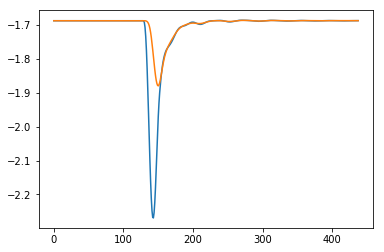

In [112]:
plt.plot(data['panel_gamma Lin Pred'])
plt.plot(data['panel_gamma Lin NoPred'])


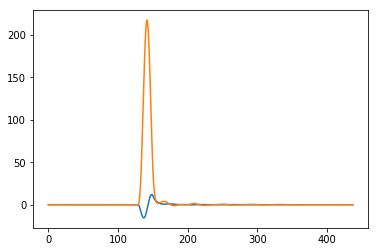

In [113]:
plt.plot(data['panel_gamma_dot Lin Pred'])
plt.plot(data['panel_gamma_dot Lin NoPred'])

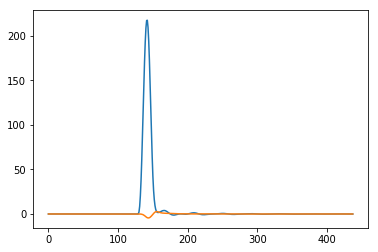

In [114]:
plt.plot(data['panel_gamma_dot Lin NoPred'])
plt.plot(dfdx_1(data['panel_gamma Lin NoPred'],dt))

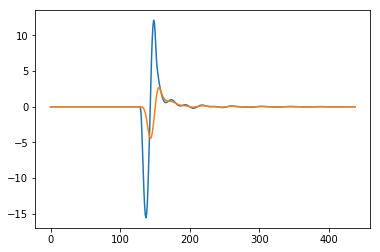

In [115]:
plt.plot(data['panel_gamma_dot Lin Pred'])
plt.plot(dfdx_1(data['panel_gamma Lin NoPred'],dt))

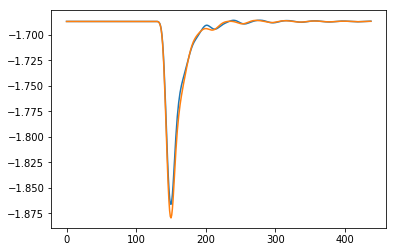

In [118]:
plt.plot(data['panel_gamma old_code pred'])
plt.plot(data['panel_gamma Lin NoPred'])

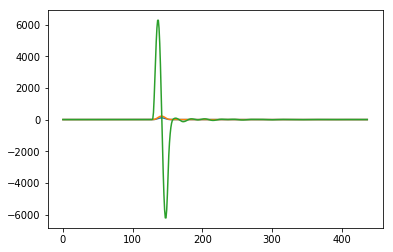

In [120]:
plt.plot(data['panel_gamma_dot_old code pred'])
plt.plot(data['panel_gamma_dot Lin NoPred'])
plt.plot(dfdx_1(data['panel_gamma_dot Lin NoPred'], dt))